<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Optimizacion cuantica con algoritmos variacionales (VQE y QAOA)

In [1]:
#!pip install qiskit-algorithms

In [2]:
from qiskit import Aer, transpile
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.providers.fake_provider import FakeVigo
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.utils import algorithm_globals
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram, plot_state_city

from qiskit.primitives import Estimator  #RUNTIME PRIMITIVE ESTIMATOR
from qiskit.circuit.library import TwoLocal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
from qiskit.algorithms.minimum_eigensolvers import VQE, QAOA, SamplingVQE, NumPyMinimumEigensolver  # new import!!!
from qiskit_algorithms import NumPyMinimumEigensolver

from qiskit.algorithms.optimizers import SPSA, COBYLA, L_BFGS_B, SLSQP
from qiskit.primitives import Estimator, Sampler

/tmp/ipykernel_18655/712742674.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.minimum_eigensolvers import VQE, QAOA, SamplingVQE, NumPyMinimumEigensolver  # new import!!!


## Modelizacion de problemas de optimizacion en Qiskit

Para modelizar y resolver un problema de optimizacion en Qiskit se realizan los siguientes pasos:

1.  Construir el modelo matematico del problema de optimizacion cuadratico. Para ello tendremos que **construir un objeto de la clase `Quadratic Program`**

2.   **Conversión de `Quadratic Program` a un QUBO y a un Hamiltoniano de Ising**

3.   **Encontrar la solución mediante la funcion `MinimumEigenOptimizer`** utilizando el algoritmo de resolucion que nosotros deseemos (p.e. VQE o QAOA)



Tambien tiene implementadas otras clases que nos calculan el objeto de esta clase para problemas especificos de optimizacion. Ver librería [Aplicaciones de optimizacion](https://qiskit.org/ecosystem/optimization/apidocs/qiskit_optimization.applications.html)

## Problema de Optimizacion VertexCover

Formalmente, una [cubierta de vértice](https://en.wikipedia.org/wiki/Vertex_cover) V′ de un gráfico no dirigido G=(V,E) es un subconjunto de V tal que u,v∈E ⇒ u∈ V′ o v∈V′, es decir es un conjunto de vértices V′ donde cada arista tiene al menos un punto final en la cubierta de vértices V′. Se dice que un conjunto de este tipo cubre los bordes de V. La figura superior muestra dos ejemplos de coberturas de vértices, con algunas coberturas de vértices V′ marcadas en rojo.

Una cobertura de vértice mínima es una cobertura de vértice del tamaño más pequeño posible. El número de cobertura de vértice T es el tamaño de una cobertura de vértice mínima, es decir, T=|V′|. La figura inferior muestra ejemplos de coberturas mínimas de vértices en los gráficos anteriores.

Posibles aplicaciones de este problema:

* En redes de telecomunicaciones para monitoreo de tráfico: colocar un número limitado de equipos de monitoreo de tráfico en enrutadores en una red de telecomunicaciones.
* En redes de Transporte Público para monitoreo de tráfico: colocación de cámaras en cruces para monitorear el tráfico total con una mínima inversión.
* En Seguridad de Redes Informáticas o Redes Sociales: desarrollar estrategias para diseñar estrategias óptimas de protección de la red contra ataques de virus o noticias falsas en tiempo real protegiendo algunos nodos estratégicos de la red.

Creamos un grado de 6 nodos para el que debes de resolver el problema `Vertex Cover`.

Aplica los pasos de resolucion anteriores para este problema de optimizacion en este grado, utilizando las librerías de Qiskit y resolviendolo tanto con un Provider tradicional como con Runtime en entornos de simulacion.

[0, 1, 2, 3, 4, 5]
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5)]


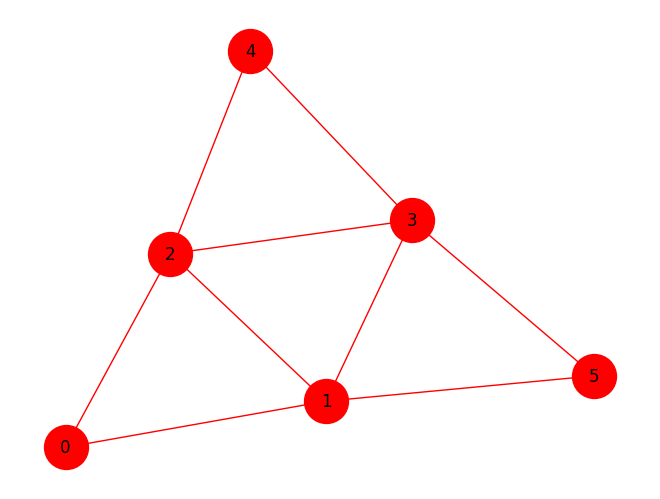

In [4]:
import networkx as nx
#Creamos un grafo, notese que los nombres de los nodos son numericos, esto es importante que sea asi para que funcione la clase VertexCover de qiskit_optimization.applications
n=6
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(1,5)
G.add_edge(3,5)

pos = nx.spring_layout(G, seed=121)

print(G.nodes())
print(G.edges())

nx.draw(G,with_labels=True, node_size=1000, node_color='red', edge_color='red',pos=pos)

In [5]:
#Crear Quadratic Problem
#https://qiskit.org/ecosystem/optimization/stubs/qiskit_optimization.applications.VertexCover.html#qiskit_optimization.applications.VertexCover
from qiskit_optimization.applications import VertexCover  #estas librerias de qiskit tienen helper functions para interpretar resultados

problema = VertexCover(G)
quadratic = problema.to_quadratic_program() # Problema cuadrático

# Imprimimos el problema en un formato deseable
print(quadratic.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Vertex cover

Minimize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5
Subject To
 c0: x_0 + x_1 >= 1
 c1: x_0 + x_2 >= 1
 c2: x_1 + x_2 >= 1
 c3: x_1 + x_3 >= 1
 c4: x_1 + x_5 >= 1
 c5: x_2 + x_3 >= 1
 c6: x_2 + x_4 >= 1
 c7: x_3 + x_4 >= 1
 c8: x_3 + x_5 >= 1

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5
End



In [6]:
#Crear QUBO y H Ising

# Creamos el problema QUBO
conv = QuadraticProgramToQubo()
qubo = conv.convert(quadratic)
print("QUBO:")
print(str(qubo)+'\n')

# Obtenemos el problema Ising correspondiente
ising, offset = qubo.to_ising()
print("ISING Hamiltonian:")
print(ising)
print(offset)

QUBO:
minimize 7*x_0*x_1 + 7*x_0*x_2 + 7*x_1*x_2 + 7*x_1*x_3 + 7*x_1*x_5 + 7*x_2*x_3 + 7*x_2*x_4 + 7*x_3*x_4 + 7*x_3*x_5 - 13*x_0 - 27*x_1 - 27*x_2 - 27*x_3 - 13*x_4 - 13*x_5 + 63 (6 variables, 0 constraints, 'Vertex cover')

ISING Hamiltonian:
SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZIZI', 'ZIIIZI', 'IIZZII', 'IZIZII', 'IZZIII', 'ZIZIII'],
              coeffs=[3.  +0.j, 6.5 +0.j, 6.5 +0.j, 6.5 +0.j, 3.  +0.j, 3.  +0.j, 1.75+0.j,
 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j,
 1.75+0.j])
18.75


Una vez formulado y convertido el problema, resolveremos este clásicamente (con el algoritmo clásico de $\verb|NumPy|$), usando VQE, y mediante un proceso QAOA.

result:
 {   'aux_operators_evaluated': None,
    'eigenstate': Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2, 2, 2, 2)),
    'eigenvalue': (-15.75+0j)}
{'001110': 1.0}


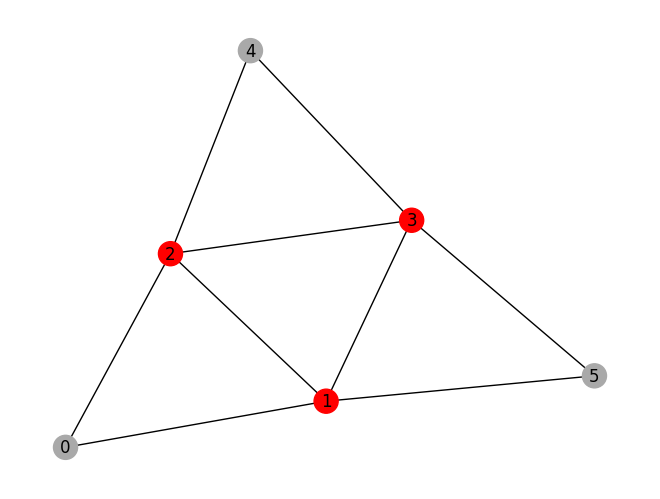

In [7]:
#Resolver con algoritmo clásico de Numpy

# Numpy Eigensolver
npme = NumPyMinimumEigensolver()
result = npme.compute_minimum_eigenvalue(ising)
print('result:\n', result)

print(result.eigenstate.probabilities_dict()) # Mostramos el resultado

# Dibujamos lo obtenido cambiando el orden de los bits
nd=np.array([0,1,1,1,0,0])
problema.draw(nd,pos=pos) # En rojo se resaltan los vértices de la solución

Si no se hubiera invertido el orden, se habría obtenido en su lugar el siguiente grafo:

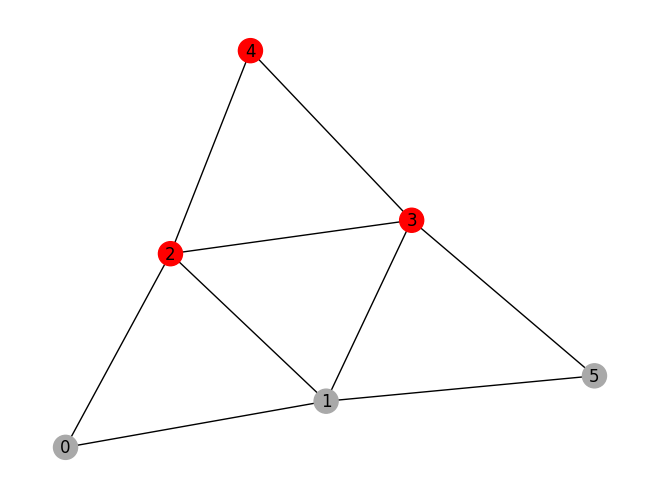

In [8]:
# Dibujamos lo obtenido sin cambiar el orden de los bits
nd=np.array([0,0,1,1,1,0])
problema.draw(nd,pos=pos) # En rojo se resaltan los vértices de la solución

Obsérvese cómo hay aristas que no están conectadas con los nodos que conforman parte del conjunto representado en rojo. Por ejemplo, la arista uniendo los nodos 0 y 1. Es por ello por lo que optamos por invertir el orden de los bits obtenidos en la solución. Esto se volverá a hacer para las resoluciones restantes.

24


/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


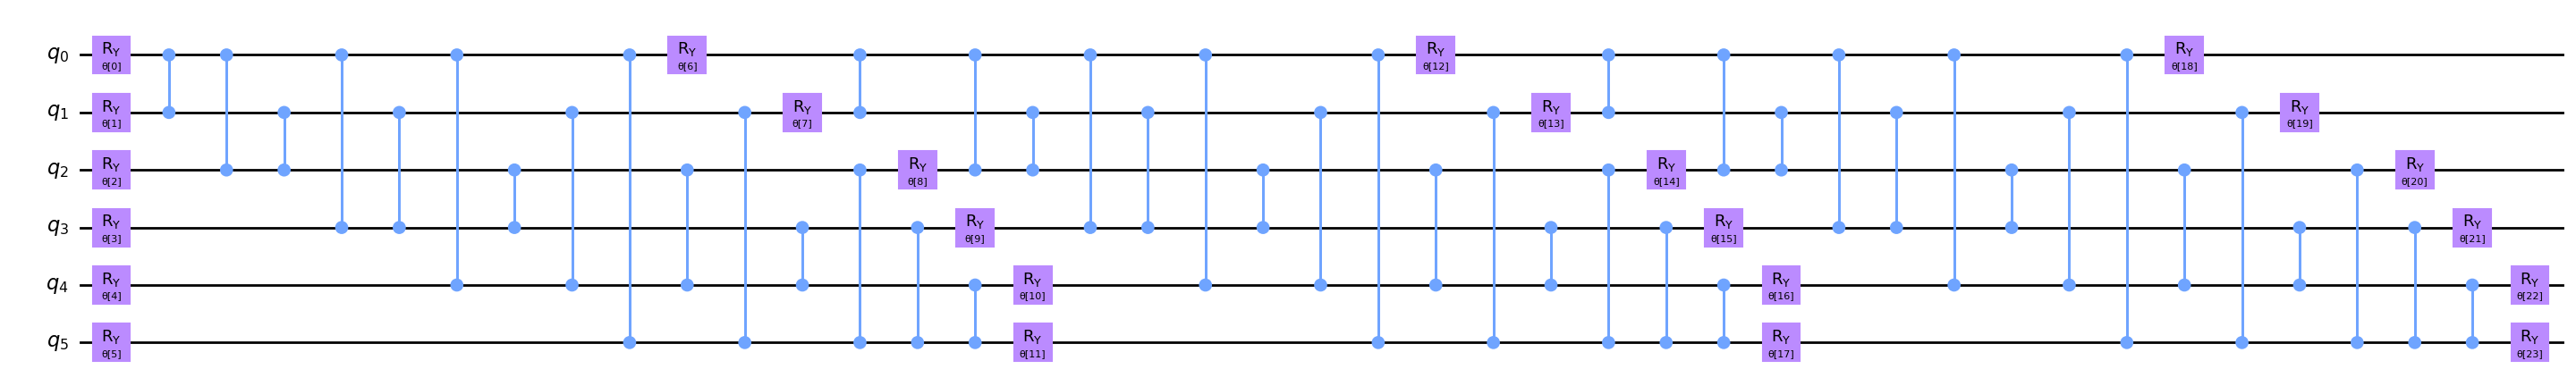

SamplingMinimumEigensolverResult:
	Eigenvalue: -15.750000000000002
	Best measurement
: {'state': 14, 'bitstring': '001110', 'value': (-15.75+0j), 'probability': 0.26513671875}



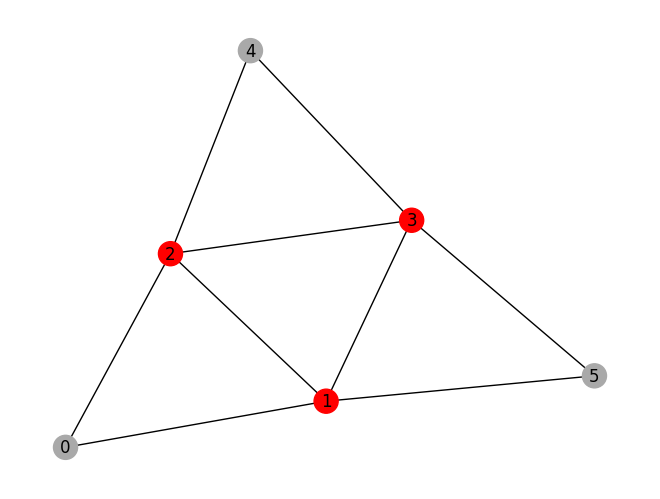

In [9]:
#Resolver con VQE Runtime
n = 6

ansatz =TwoLocal(n, "ry", "cz", reps=3, entanglement="full")
print(ansatz.num_parameters) # Número de parámetros para el ansatz creado
display(ansatz.decompose().draw("mpl",fold=-1)) # Mostramos dicho ansatz

opt = SPSA(maxiter=50)

# Simulamos
sampler = Sampler(options={"shots": 2048})
vqe = SamplingVQE(sampler, ansatz, opt, aggregation=0.2)

# Calculamos el autovalos mínimo
result = vqe.compute_minimum_eigenvalue(ising)
print(result) # El resultado es el mismo

# Volvemos a mostrar el gráfico, invirtiendo el orden de los bits del resultado
nd=np.array([0,1,1,1,0,0])
problema.draw(nd,pos=pos) # En rojo se resaltan los vértices de la solución

SamplingMinimumEigensolverResult:
	Eigenvalue: -13.519988340024335
	Best measurement
: {'state': 14, 'bitstring': '001110', 'value': (-15.75+0j), 'probability': 0.1674278108997788}



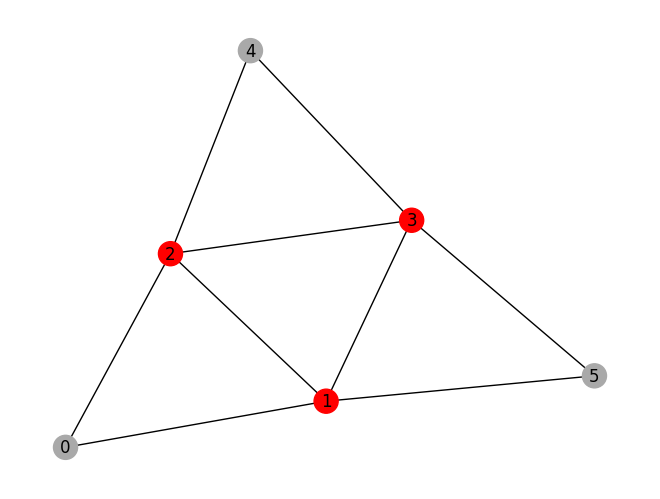

In [10]:
#Resolver con QAOA Runtime
# Simulamos
sampler = Sampler()
 
optimizer = COBYLA()
qaoa = QAOA(sampler, optimizer, reps=2) # Lo repetiremos 2 veces
 
# Calculamos el menor de los autovalores
result = qaoa.compute_minimum_eigenvalue(ising)
print(result) # Mismo resultado

# Volvemos a mostrar el gráfico, invirtiendo el orden de los bits del resultado
nd=np.array([0,1,1,1,0,0])
problema.draw(nd,pos=pos) # En rojo se resaltan los vértices de la solución